2477. Minimum Fuel Cost to Report to the Capital
There is a tree (i.e., a connected, undirected graph with no cycles) structure country network consisting of n cities numbered from 0 to n - 1 and exactly n - 1 roads. The capital city is city 0. You are given a 2D integer array roads where roads[i] = [ai, bi] denotes that there exists a bidirectional road connecting cities ai and bi.

There is a meeting for the representatives of each city. The meeting is in the capital city.

There is a car in each city. You are given an integer seats that indicates the number of seats in each car.

A representative can use the car in their city to travel or change the car and ride with another representative. The cost of traveling between two cities is one liter of fuel.

Return the minimum number of liters of fuel to reach the capital city.

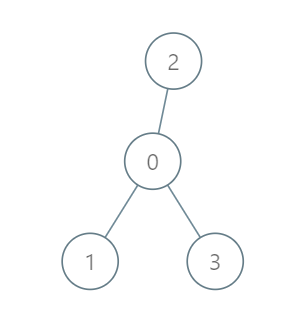

Input: roads = [[0,1],[0,2],[0,3]], seats = 5
Output: 3
Explanation: 
- Representative1 goes directly to the capital with 1 liter of fuel.
- Representative2 goes directly to the capital with 1 liter of fuel.
- Representative3 goes directly to the capital with 1 liter of fuel.
It costs 3 liters of fuel at minimum. 
It can be proven that 3 is the minimum number of liters of fuel needed.

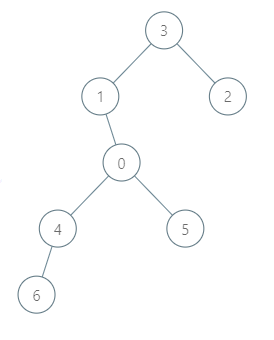

Input: roads = [[3,1],[3,2],[1,0],[0,4],[0,5],[4,6]], seats = 2
Output: 7
Explanation: 
- Representative2 goes directly to city 3 with 1 liter of fuel.
- Representative2 and representative3 go together to city 1 with 1 liter of fuel.
- Representative2 and representative3 go together to the capital with 1 liter of fuel.
- Representative1 goes directly to the capital with 1 liter of fuel.
- Representative5 goes directly to the capital with 1 liter of fuel.
- Representative6 goes directly to city 4 with 1 liter of fuel.
- Representative4 and representative6 go together to the capital with 1 liter of fuel.
It costs 7 liters of fuel at minimum. 
It can be proven that 7 is the minimum number of liters of fuel needed.

In [99]:
from collections import defaultdict, deque
class Solution:
    def minimumFuelCost(self, roads, seats: int):
        if len(roads) == 0 :
            return 0
        neighbors = defaultdict(list)
        for v, w in roads :
            neighbors[v].append(w)
            neighbors[w].append(v)
        visited = {}
        for v in range(len(neighbors)) :
            visited[v] = False
        allpath = defaultdict(list)
        q = deque()
        q.append((0, []))
        while q :
            node, path = q.pop()
            if visited[node] == False :
                visited[node] = True
                allpath[node] = path
                for ni in neighbors[node] :
                    q.append((ni, path+[ni]))
        allpath = {k : allpath[k] for k in sorted(allpath, key = lambda k : len(allpath[k]), reverse = True)}
        print(allpath)
        result = []
        carpool = {}
        carpool[0] = True
        for v in range(1, len(neighbors)) :
            carpool[v] = False
        for k, v in allpath.items() :
            if carpool[k] == False :
                num = 0
                length = len(allpath[k])
                car = []
                while num < seats and num < length:
                    car.append(v[length - num - 1])
                    carpool[v[length-num-1]] = True
                    num += 1
                result.append(car)
        print(result)
        fuel = 0
        for i in range(len(result)) :
            fuel += len(allpath[result[i][0]])
        return fuel


In [102]:
import math
class Solution:    
    def minimumFuelCost(self, roads, seats: int) -> int: 
        adjacency_list = defaultdict(list)
        for a, b in roads:
            adjacency_list[a].append(b)
            adjacency_list[b].append(a)            
        total_fuel_cost = [0]        
        def dfs(node, parent):
            people = 1            
            for neighbor in adjacency_list[node]:
                if neighbor == parent:
                    continue
                people += dfs(neighbor, node)                
            if node != 0:
                total_fuel_cost[0] += math.ceil(people / seats)                
            return people        
        dfs(0, None)
        return total_fuel_cost[0]

In [103]:
roads = [[0,1],[0,2],[1,3],[1,4]]
seats = 5
S = Solution()
S.minimumFuelCost(roads, seats)

4

In [104]:
roads = [[3,1],[3,2],[1,0],[0,4],[0,5],[4,6]]
seats = 2
S = Solution()
S.minimumFuelCost(roads, seats)

7